In [67]:
# Import necessary libraries for data manipulation and visualization 
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib

# Configure the plotting style and inline plotting
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Set the default figure size for all plots
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

# Disable warnings related to chained assignment
pd.options.mode.chained_assignment = None

# Read the CSV file containing the movie data into a DataFrame
df = pd.read_csv('/Users/lasya/Downloads/movies.csv')

In [ ]:
# Display the first few rows of the DataFrame to understand its structure
df.head()

In [ ]:
# Check for missing data by calculating the percentage of missing values in each column
for col in df.columns:
       pct_missing = np.mean(df[col].isnull())
print('{} - {}%'.format(col, pct_missing))

In [70]:
# Drop any rows with missing data
df = df.dropna()

In [ ]:
# Verify that no missing values remain in the DataFrame
df.isnull().sum().sum() # Should return 0 if no missing values remain

In [ ]:
# Display the data types of each column to understand the structure and ensure that they are appropriate
df.dtypes

In [73]:
# Convert 'budget', 'gross', 'votes', and 'runtime' columns to integer data types for consistency
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [74]:
# Create a new column to extract the correct year from the 'released' column

In [ ]:
# We extract the first 4 digits of the 'released' column (representing the year) as a string, then convert it to integer
df['corrected_release_year'] = df['released'].str.extract(r'(\d{4})').astype(int)

# Display the DataFrame to ensure that the 'corrected_release_year' column was created correctly
df.head()

In [76]:
# Sort the DataFrame by the 'gross' column in descending order to identify the highest-grossing movies
df = df.sort_values(by=['gross'], ascending=False)

In [41]:
#Displays all the rows 
pd.set_option('display.max_rows', None)

In [77]:
# Check for any duplicate rows in the DataFrame

duplicates = df.duplicated()
print(duplicates.sum())  # This will print the total number of duplicate rows

0


In [78]:
# Drop any duplicate rows from the DataFrame
df = df.drop_duplicates()

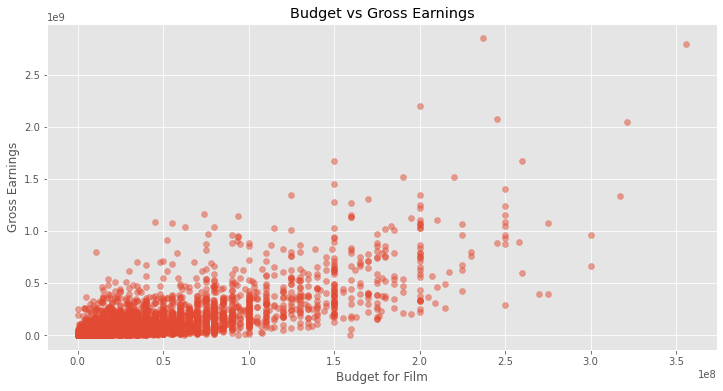

In [79]:
# Scatter plot to visually assess the relationship between budget and gross earnings

plt.figure(figsize=(12, 6))  # Setting the size of the plot
plt.scatter(df['budget'], df['gross'], alpha=0.5)  # alpha for transparency to see overlapping points

plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

In [80]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,corrected_release_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


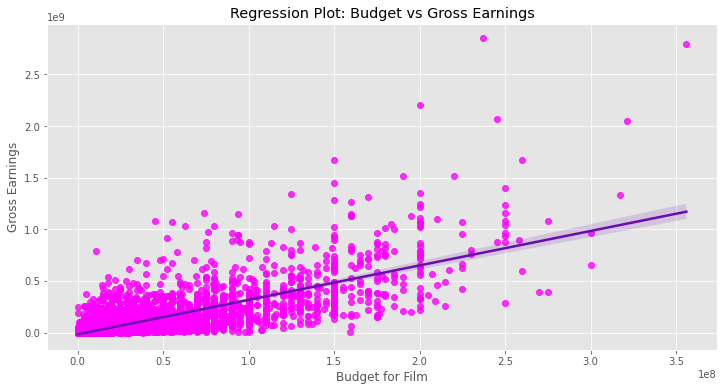

In [81]:
# Create a regplot between budget and gross with refined colors

plt.figure(figsize=(12, 6))
sns.regplot(x='budget', y='gross', data=df, 
            scatter_kws={'color': '#FF00FF', 'alpha': 0.8},   # Vivid magenta for scatter points
            line_kws={"color": '#6A0DAD', 'linewidth': 2.5})  # Deep purple for regression line
plt.title('Regression Plot: Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()



In [82]:
# Pearson correlation is appropriate here because both 'budget' and 'gross' are continuous numeric variables.
# Pearson is used to measure the strength of a linear relationship.

# Calculate the Pearson correlation between budget and gross
correlation_pearson = df['budget'].corr(df['gross'], method='pearson')
print(f'Pearson Correlation between Budget and Gross: {correlation_pearson}')

Pearson Correlation between Budget and Gross: 0.7402465439219627


In [ ]:
# Compute the Pearson correlation matrix to check for relationships between numerical variables
df.corr(method='pearson')

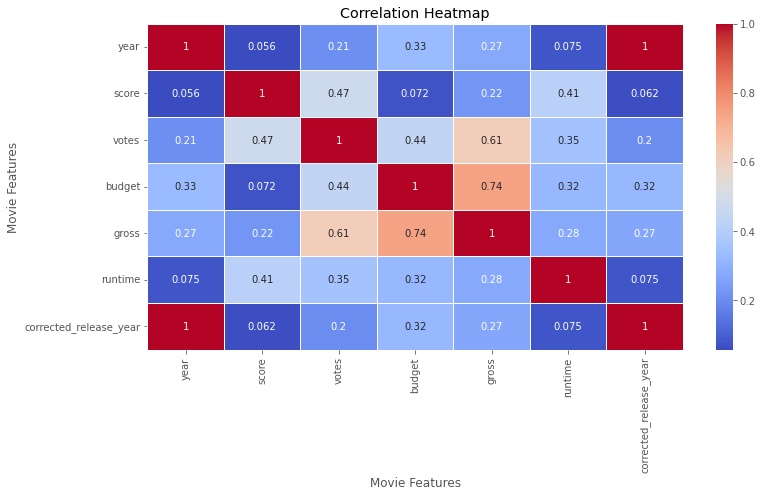

In [56]:
correlation_matrix = df.corr(method='pearson')

#Plot a heatmap of the Pearson correlation matrix to visually assess relationships between variables
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

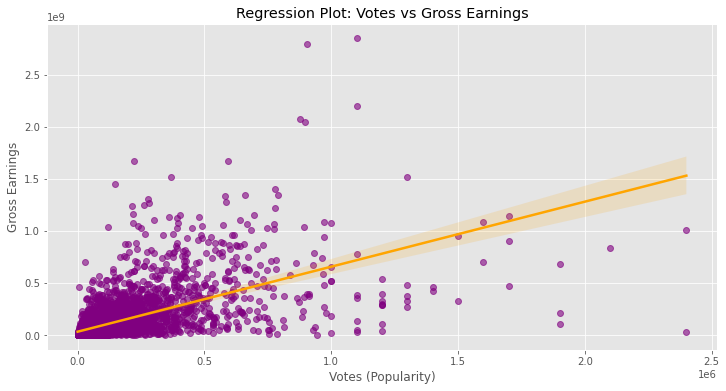

In [84]:
# Scatter plot with regression line for Votes vs Gross Earnings
plt.figure(figsize=(12, 6))
sns.regplot(x='votes', y='gross', data=df, 
            scatter_kws={'color': 'purple', 'alpha': 0.6},   # Set scatter points color to purple
            line_kws={"color": 'orange', 'linewidth': 2.5})  # Set regression line color to orange
plt.title('Regression Plot: Votes vs Gross Earnings')
plt.xlabel('Votes (Popularity)')
plt.ylabel('Gross Earnings')
plt.show()

In [ ]:
# Now, perform one-hot encoding on the 'company' column and any other necessary object-type columns
# This converts categorical variables into binary (0 or 1) columns, which can be used in regression analysis
df_encoded = pd.get_dummies(df, columns=['company'], drop_first=True)

# View the first few rows of the newly encoded DataFrame
print(df_encoded.head())

In [ ]:
# Check the data types of all columns
print(df_encoded.dtypes)

In [ ]:
# Prepare for multiple regression analysis using budget, votes, and company columns
# Select the relevant independent variables (budget, votes, and company columns)

X = df_encoded[['budget', 'votes'] + [col for col in df_encoded.columns if col.startswith('company_')]] 

y = df_encoded['gross']  # Define the dependent variable (gross earnings)


# Add a constant (intercept) to the regression model
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression results, including coefficients, p-values, and R-squared value
print(model.summary())

In [ ]:
#Based on the above output, budget and votes are the major drivers of gross earnings. 
#The companies don’t seem to play a direct, measurable role in the movie's success in terms of gross earnings. 

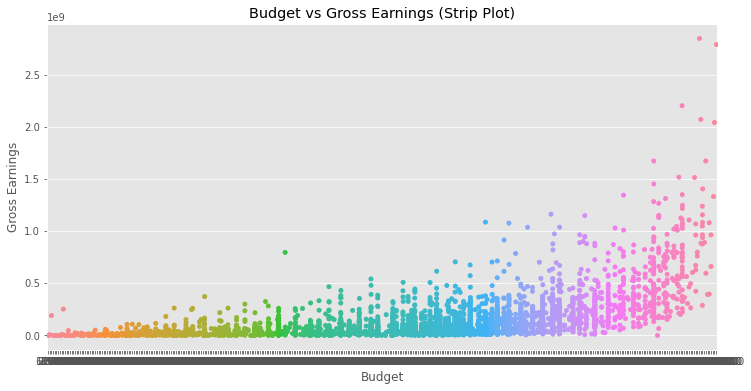

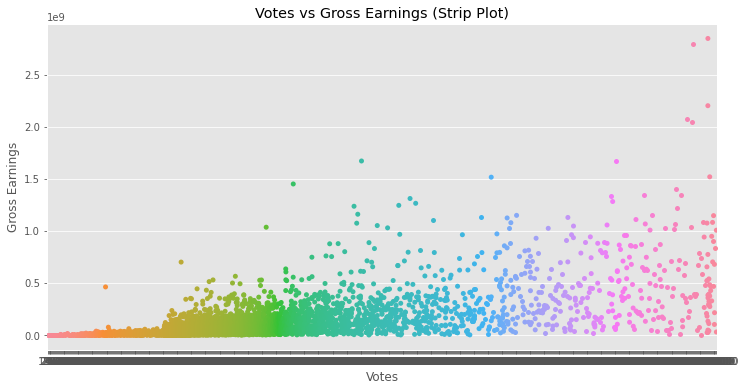

In [86]:
# Strip plot for Budget vs Gross Earnings
plt.figure(figsize=(12, 6))
sns.stripplot(x='budget', y='gross', data=df_encoded, jitter=True)
plt.title('Budget vs Gross Earnings (Strip Plot)')
plt.xlabel('Budget')
plt.ylabel('Gross Earnings')
plt.show()

# Strip plot for Votes vs Gross Earnings
plt.figure(figsize=(12, 6))
sns.stripplot(x='votes', y='gross', data=df_encoded, jitter=True)
plt.title('Votes vs Gross Earnings (Strip Plot)')
plt.xlabel('Votes')
plt.ylabel('Gross Earnings')
plt.show()

In [ ]:
#Based on the findings, budget and votes were statistically significant predictors of a movie's gross earnings. 
#While the production company did not show a statistically significant relationship with the gross earnings. 

In [ ]:
import os
os.getcwd()